In [1]:
# import libraries
import pandas as pd
import numpy as np
import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import joblib

In [2]:
data = pd.read_csv("D:/D/Machine Learning/data/Spotify/spotify_songs.csv")
data.head(3)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,mood
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,14-06-2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,Happy
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),13-12-2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,Happy
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),05-07-2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,Happy


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [4]:
# check null values inside the data
print(data.isnull().sum())
data = data.dropna()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
mood                        0
dtype: int64


In [5]:
data.dtypes

track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
mood                         object
dtype: object

In [6]:
# Handlke date
data['track_album_release_date'] = pd.to_datetime(data['track_album_release_date'], format='%d-%m-%Y')
data['date'] = data['track_album_release_date'].dt.day
data['month'] = data['track_album_release_date'].dt.month
data['year'] = data['track_album_release_date'].dt.year

data = data.drop(columns=['track_album_release_date'])

In [7]:
# Rremove unnecessary column 
data = data.drop(columns=['track_id', 'track_album_id', 'playlist_id'])
data.head(3)

,track_name,track_artist,track_popularity,track_album_name,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,mood,date,month,year
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,I Don't Care (with Justin Bieber) [Loud Luxury...,Pop Remix,pop,dance pop,0.748,0.916,6,...,0.1020,0.000000,0.0653,0.518,122.036,194754,Happy,14,6,2019
1,Memories - Dillon Francis Remix,Maroon 5,67,Memories (Dillon Francis Remix),Pop Remix,pop,dance pop,0.726,0.815,11,...,0.0724,0.004210,0.3570,0.693,99.972,162600,Happy,13,12,2019
2,All the Time - Don Diablo Remix,Zara Larsson,70,All the Time (Don Diablo Remix),Pop Remix,pop,dance pop,0.675,0.931,1,...,0.0794,0.000023,0.1100,0.613,124.008,176616,Happy,5,7,2019


In [8]:
# Categorized column based on their data type
column_object = data.select_dtypes(include=['object']).columns
column_int = data.select_dtypes(include=['int64']).columns
column_float = data.select_dtypes(include=['float64']).columns

print(column_object)
print(column_int)
print(column_float)

Index(['track_name', 'track_artist', 'track_album_name', 'playlist_name',
       'playlist_genre', 'playlist_subgenre', 'mood'],
      dtype='object')
Index(['track_popularity', 'key', 'mode', 'duration_ms'], dtype='object')
Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')


In [9]:
# Applying text cleaning process
# cleaning text
stop_word = set(stopwords.words('english'))
def remove_stopword(txt):
    word_token = word_tokenize(str(txt).lower())
    flt = [word for word in word_token if word.isalpha() and word not in stop_word]
    return " ".join(flt)

def cleaning_text(data):
    dum_data = data
    column_object = dum_data.select_dtypes(include=['object']).columns
    column_int = dum_data.select_dtypes(include=['int64']).columns
    column_float = dum_data.select_dtypes(include=['float64']).columns

    # Normalizae text
    for i in column_object:
        dum_data[i] = dum_data[i].str.lower()
        dum_data[i] = dum_data[i].str.strip()
    
    # Remove punctuation
    for i in column_object:
        dum_data[i] = data[i].str.replace(r'[^\w\s]', '', regex=True)

    # Stop word function
    for i in column_object:
        dum_data[i] = dum_data[i].apply(remove_stopword)
    return data


data = cleaning_text(data)

In [10]:
# Label encoding
from sklearn import preprocessing
label = preprocessing.LabelEncoder()

def label_encoding(data):
    dum_data = data
    column = dum_data.select_dtypes(include=['object']).columns
    encoders = {}
    for i in column:
        label = preprocessing.LabelEncoder()
        data[i] = label.fit_transform(data[i])
        encoders[i] = label
    
    label_fun = joblib.dump(encoders, 'label_encoder.pkl')
    return{
        'data': dum_data,
        'label_function': label_fun
    }

data = label_encoding(data)
data = data['data']

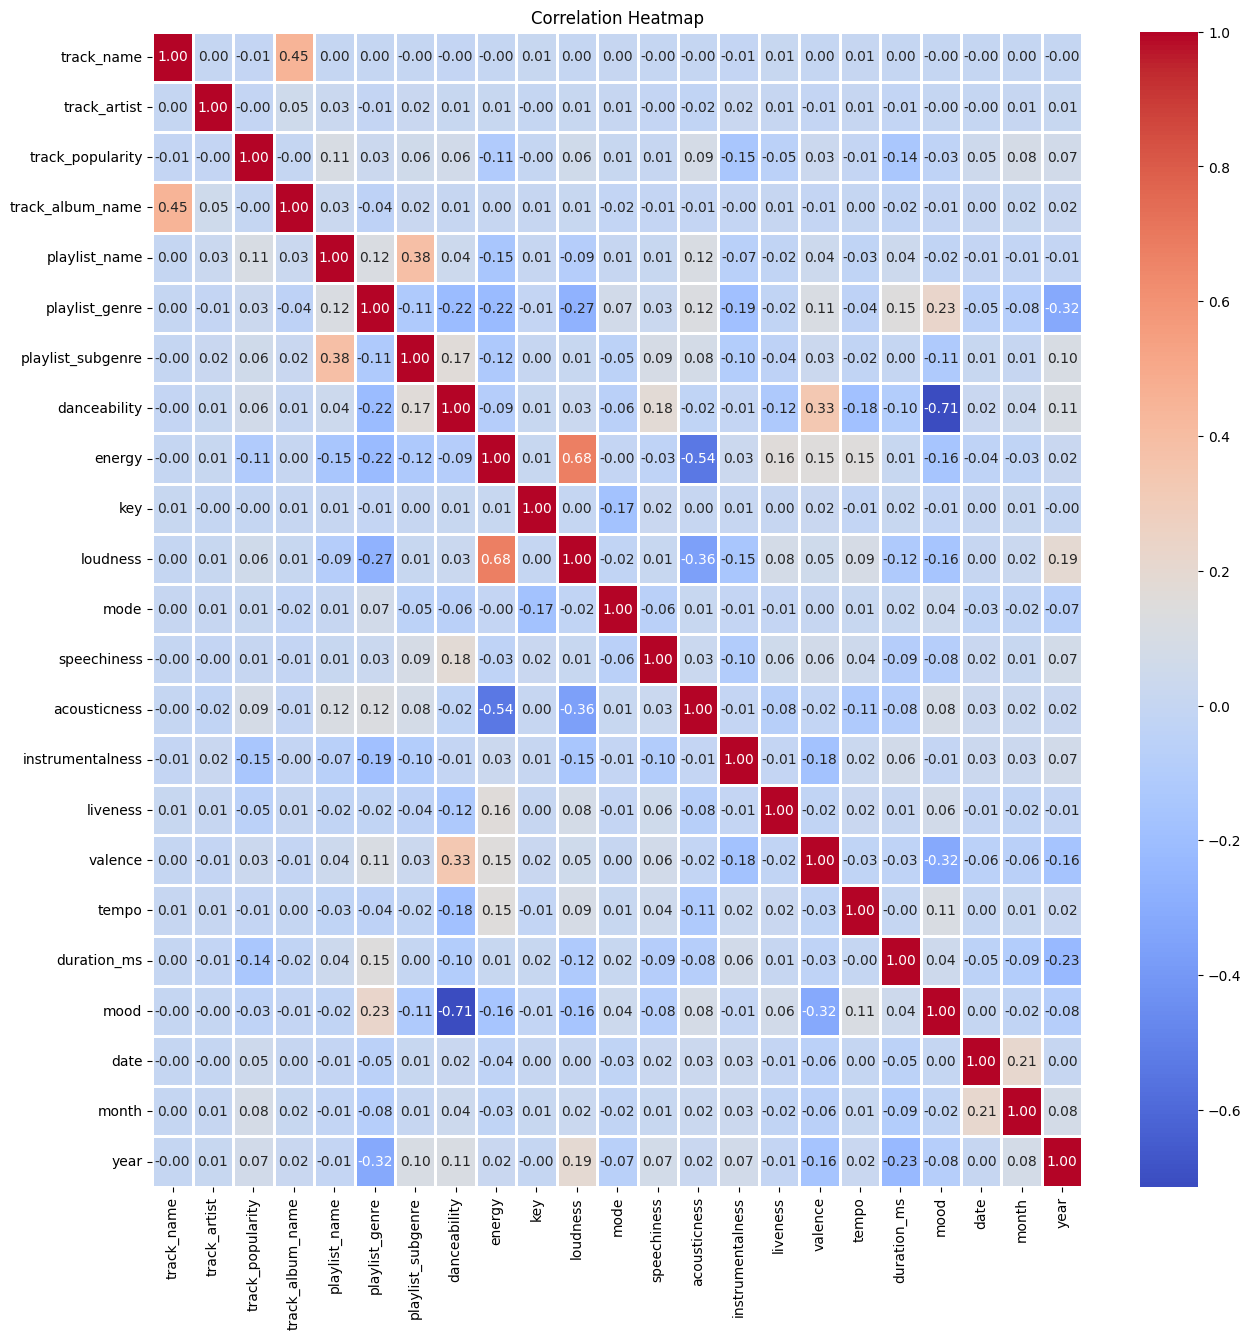

In [11]:
# try to find relation between data
import seaborn as sns
import matplotlib.pyplot as plt

corr = data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.9)
plt.title("Correlation Heatmap")
plt.show()

In [12]:
# Split data
from sklearn.model_selection import train_test_split
scale = preprocessing.StandardScaler()

X = data.drop(columns=['mood', 'danceability', 'valence', 'playlist_genre'], axis=1)
X = preprocessing.scale(X)
y = data['mood']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X


array([[-0.94500822, -0.75067332,  0.9414075 , ..., -0.04436792,
        -0.11794241,  0.48201445],
       [ 0.21372924,  0.35154133,  0.98143937, ..., -0.15021124,
         1.53762204,  0.48201445],
       [ 1.32983095,  1.71119814,  1.10153499, ..., -0.9969578 ,
         0.157985  ,  0.48201445],
       ...,
       [ 1.21756231,  1.2645554 , -1.14024986, ...,  0.69653533,
        -0.66979722,  0.2951085 ],
       [ 0.18459207,  0.3706231 , -1.10021799, ..., -1.42033109,
        -1.49757945,  0.2951085 ],
       [ 1.42695485, -0.08087093, -0.61983552, ..., -1.20864445,
        -0.94572463,  0.2951085 ]])

In [13]:
# Build randmforest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def random_forest_classifier():
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    return acc

random_forest_classifier()

0.7946999695400548

In [14]:
# SVM model for data
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

def svm_model(X_train, X_test, y_train, y_test):
    svm_model = svm.SVC(kernel='poly', degree=3, C=1 )
    svm_model.fit(X_train, y_train) 
    y_pred = svm_model.predict(X_test)   
    accuracy  = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    return(
        {
            "SVM accuracy": accuracy,
            "SVm f1-score": f1
        }
    )

svm_model(X_train, X_test, y_train, y_test)

{'SVM accuracy': 0.6236166108234339, 'SVm f1-score': 0.6244245874817346}

In [15]:
# Try decision tree
from sklearn.tree import DecisionTreeClassifier

def decision_tree():
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    joblib.dump(model, 'decision_tree.pkl')
    return{
        'Accuracy: ' : acc,
        'Model: ': joblib.load('decision_tree.pkl')
    }

decision_tree()

{'Accuracy: ': 0.7006802721088435, 'Model: ': DecisionTreeClassifier()}

In [16]:
# Bud nureal neworkl
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

def neural_network():
    model = MLPClassifier(
        hidden_layer_sizes=(100, 50),
        activation='relu',
        solver='adam',
        max_iter=300,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    joblib.dump(model, 'neural_network.pkl')

    acc = accuracy_score(y_test, y_pred)

    return{
        'Accuracy: ' : acc,
        'Model: ' : joblib.load('neural_network.pkl')
    }

neural_network()

C:\Users\jaini\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


{'Accuracy: ': 0.6792567773378008,
 'Model: ': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)}